In [1]:
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn import linear_model, datasets
import sklearn.metrics as mt



### Load Data File

In [20]:
df = pd.read_csv("/Users/raghuramsrinivas/anaconda/bin/Immersion/Enhanced_10000Rows-ALL.csv")

In [21]:
if "Unnamed: 0"  in df.columns:
    del df["Unnamed: 0"]
    
if "Unnamed: 0.1"  in df.columns:
    del df["Unnamed: 0.1"]
    
if "Author"  in df.columns:
    del df["Author"]

#if "BusinessService"  in df.columns:
#    del df["BusinessService"]

if "File"  in df.columns:
    del df["File"]

if "Content"  in df.columns:
    del df["Content"]

In [22]:
X=df[["Cleanliness","Rooms","Service","Location","CheckIn","Value","Overall","BusinessService"]]
X.head(3)

,Cleanliness,Rooms,Service,Location,CheckIn,Value,Overall,BusinessService
0,3,3,-1,4,3,3,3,-1
1,5,2,2,5,3,2,2,3
2,5,4,4,5,4,4,5,4


### Evaluate predictors for Overall hotel satisfaction rating using the composite recorded scores

In [6]:
%matplotlib inline
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Library/Python/2.7/site-packages/ipython-5.0.0b4-py2.7.egg/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


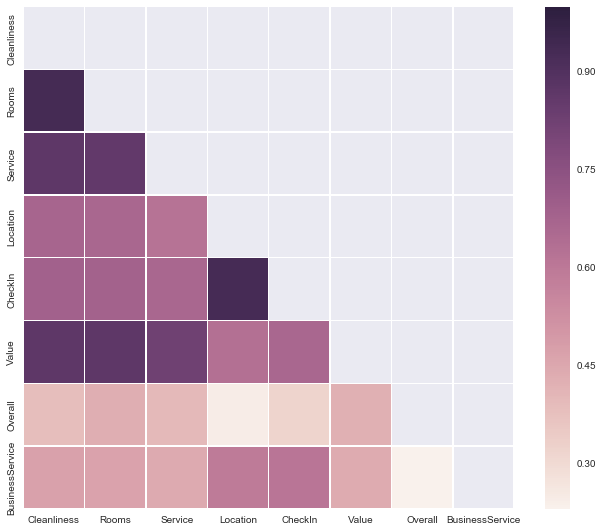

In [7]:
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, annot=True,mask=mask, cmap=cmap, vmax=.99,square=True, xticklabels=5, yticklabels=5,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

sns.heatmap(corr,annot=False, linewidths=.5,mask=mask)

In [8]:
if "Overall" in X.columns:
    Y = X["Overall"]
    del X["Overall"]
    #X = df
    #X= df[["Cleanliness","Rooms","Service","Location","CheckIn","Value"]]


XScaled = preprocessing.StandardScaler().fit_transform(X)

XTrain,XTest,YTrain,YTest = train_test_split(XScaled,Y)

#lm = linear_model.LinearRegression()
lm = linear_model.LinearRegression()
ml = lm.fit(XTrain,YTrain)
YPred = ml.predict(XTest)
ml.score(XTest,YTest)


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


0.23070058550720129

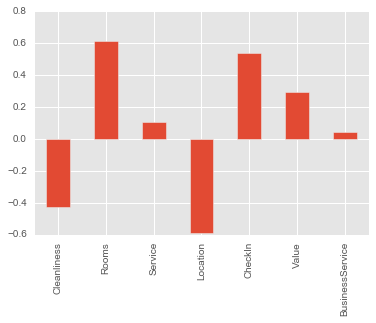

In [9]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(ml.coef_,index=X.columns)
weights.plot(kind='bar')
plt.show()

### Evaluate scores using the features generated by Watson tone_analyzer()

In [10]:
import json
from watson_developer_cloud import ToneAnalyzerV3

tone_analyzer = ToneAnalyzerV3(username='23c3a099-7a3f-4ad8-8309-9ad8616d2f96',password='VOIxUdbLEYIW',version='2016-02-11')

In [11]:
def performToneAnalysis(strText):
    dict={}
    jsonObj = tone_analyzer.tone(text=strText)

    catArr  = jsonObj["document_tone"]["tone_categories"]
    
    tonesObj= catArr[0]["tones"]
    dict["Anger"] = tonesObj[0]["score"]
    dict["Disgust"] = tonesObj[1]["score"]
    dict["Fear"] = tonesObj[2]["score"]
    dict["Joy"] = tonesObj[3]["score"]
    dict["Sadness"] = tonesObj[4]["score"]
 
    tonesObj= catArr[1]["tones"]
    dict["analytical"] = tonesObj[0]["score"]
    dict["confident"] = tonesObj[1]["score"]
    dict["tentative"] = tonesObj[2]["score"]
  
 
    tonesObj= catArr[2]["tones"]
    dict["Openness"] = tonesObj[0]["score"]
    dict["Conscientiousness"] = tonesObj[1]["score"]
    dict["Extraversion"] = tonesObj[2]["score"]
    dict["Agreeableness"] = tonesObj[3]["score"]
    dict["EmotionalRange"] = tonesObj[4]["score"]
 
    
    return dict

In [12]:
#Sample Text
strText = "What a miserable excuse for a hotel! I cannot believe that I actually spent hard earned money to spend a miserable, hot (no air conditioning), noisy (traffic noise kept me up for hours even though I was dead tired) night in a closet (the bed barely fit) of a room. The elevator barely worked (and it doesn't even go to the lobby -- you have to walk up a flight of stairs to get to the elevator!!!), the hallways were hot and smelly, the furniture was archaic, and the bathroom was probably nice enough in 1950, but in 2004 it's a snake pit. Stay away. Stay far, far away. You are welcome to contact me if I haven't made myself perfectly clear! The name's Barry and the e-mail address is blb417@hotmail.com if you want more info."

print(strText)

What a miserable excuse for a hotel! I cannot believe that I actually spent hard earned money to spend a miserable, hot (no air conditioning), noisy (traffic noise kept me up for hours even though I was dead tired) night in a closet (the bed barely fit) of a room. The elevator barely worked (and it doesn't even go to the lobby -- you have to walk up a flight of stairs to get to the elevator!!!), the hallways were hot and smelly, the furniture was archaic, and the bathroom was probably nice enough in 1950, but in 2004 it's a snake pit. Stay away. Stay far, far away. You are welcome to contact me if I haven't made myself perfectly clear! The name's Barry and the e-mail address is blb417@hotmail.com if you want more info.


In [13]:
performToneAnalysis(strText)

{'Agreeableness': 0.435,
 'Anger': 0.912251,
 'Conscientiousness': 0.212,
 'Disgust': 0.466404,
 'EmotionalRange': 0.841,
 'Extraversion': 0.525,
 'Fear': 0.091093,
 'Joy': 0.022115,
 'Openness': 0.336,
 'Sadness': 0.083517,
 'analytical': 0.438,
 'confident': 0.3,
 'tentative': 0.0}

### Review features extracted by tone_analyzer()

In [15]:
df.head()

,Agreeableness,Anger,BusinessService,CheckIn,Cleanliness,Conscientiousness,Disgust,EmotionalRange,Extraversion,Fear,...,Location,Openness,Overall,Rooms,Sadness,Service,Value,analytical,confident,tentative
0,0.899,0.229006,-1,3,3,0.164,0.120950,0.747,0.540,0.092245,...,4,0.241,3,3,0.119248,-1,3,0.270,0.922,0.000
1,0.918,0.396086,3,3,5,0.093,0.235150,0.805,0.778,0.229930,...,5,0.133,2,2,0.239326,2,2,0.733,0.000,0.534
2,0.960,0.460508,4,4,5,0.813,0.037194,0.521,0.855,0.064094,...,5,0.145,5,4,0.021335,4,4,0.384,0.656,0.000
3,0.536,0.473059,-1,3,3,0.813,0.156185,0.255,0.329,0.257246,...,3,0.719,3,3,0.096640,3,3,0.270,0.922,0.000
4,0.849,0.610163,-1,3,5,0.586,0.037826,0.299,0.720,0.027203,...,5,0.449,4,4,0.025254,5,5,0.082,0.290,0.000


### Evaluate predictors for Overall hotel satisfaction rating using the new qualitative feature

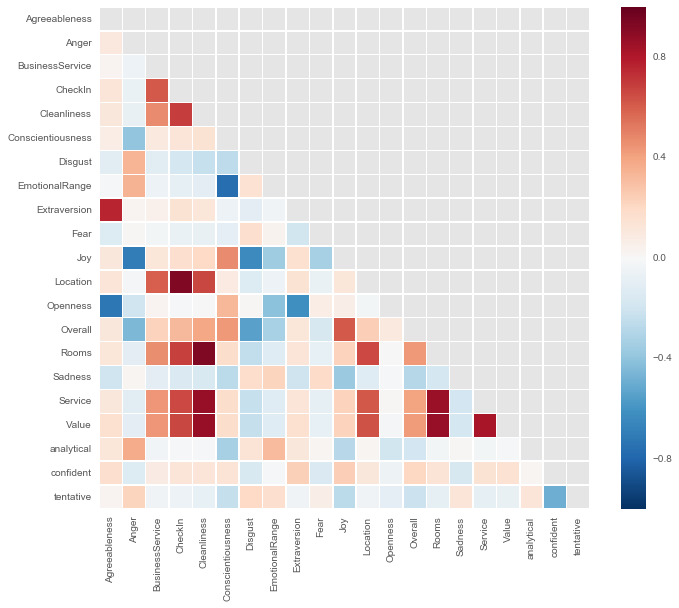

In [16]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, annot=True,mask=mask, cmap=cmap, vmax=.99,square=True, xticklabels=5, yticklabels=5,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

sns.heatmap(corr,annot=False, linewidths=.5,mask=mask)

In [17]:
if "Overall" in df.columns:
    Y=df["Overall"]
    del df["Overall"]
 

XScaled = preprocessing.StandardScaler().fit_transform(df)

XTrain,XTest,YTrain,YTest = train_test_split(XScaled,Y)

#lm = linear_model.LinearRegression()
lm = linear_model.LinearRegression()
ml = lm.fit(XTrain,YTrain)
YPred = ml.predict(XTest)
ml.score(XTest,YTest)


0.54239466894762867

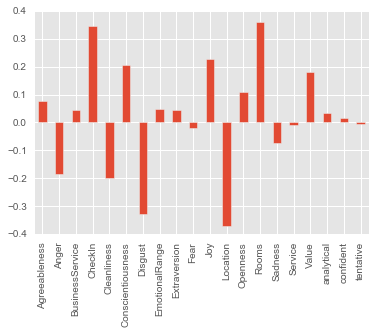

In [18]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(ml.coef_,index=df.columns)
weights.plot(kind='bar')
plt.show()